# Kernels walk, [stride](https://www.merriam-webster.com/dictionary/stride) and even jump all over images

##Getting ready with **IMPORTS**

In [ ]:
import numpy as np
from scipy.linalg import orth
from scipy.ndimage import convolve
import skimage
from skimage import io
from skimage.exposure import histogram

# import plotting libraries
import plotly.express as px
import plotly.graph_objects as go

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
# also import the matrix printing function
!rm bug_numpy_utils.py
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
from bug_numpy_utils import MatPrint
from bug_numpy_utils import MatImshow

# download sample images
!rm *.jpg
!wget https://github.com/bugrakoku/data4all/raw/main/con1.jpg
!wget https://github.com/bugrakoku/data4all/raw/main/con2.jpg
!wget https://github.com/bugrakoku/data4all/raw/main/con3.jpg
!wget https://github.com/bugrakoku/data4all/raw/main/con4.jpg
!wget https://github.com/bugrakoku/data4all/raw/main/con5.jpg

print('done with importing necessary stuff')


rm: cannot remove 'bug_numpy_utils.py': No such file or directory
--2022-12-05 12:04:50--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14157 (14K) [text/plain]
Saving to: ‘bug_numpy_utils.py’

bug_numpy_utils.py  100%[===================>]  13.83K  --.-KB/s    in 0s      

2022-12-05 12:04:50 (59.0 MB/s) - ‘bug_numpy_utils.py’ saved [14157/14157]

rm: cannot remove '*.jpg': No such file or directory
--2022-12-05 12:04:53--  https://github.com/bugrakoku/data4all/raw/main/con1.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.git

In [ ]:
!ls -al



```
# This is formatted as code
```

## Verify convolution via Hadamard product

Just focus on the center of the data matrix

In [ ]:
a = np.array([[1,2,1], [1,5,1], [1,5,1]])
b = np.array( [[-1, -1, -1], [0,0,0], [1,1,1]] )
breflected = b[-1::-1,:]
MatPrint(a, 'data matrix')
MatPrint(b, 'b')
MatPrint(breflected, 'kernel')
print(f'\nsum of hadamard --> {(a*b).sum()}')
print(f'sum of hadamard with reflected b --> {(a*breflected).sum()}')
ab = convolve(a,b, mode='constant', cval=0)
MatPrint(ab, '\nconvolution of a.b')
print(f'\nObserve that {(a*breflected).sum()} = {ab[1,1]}\nmoving on...')

data matrix
|     1.00     2.00     1.00 |
|     1.00     5.00     1.00 |
|     1.00     5.00     1.00 |
b
|    -1.00    -1.00    -1.00 |
|     0.00     0.00     0.00 |
|     1.00     1.00     1.00 |
kernel
|     1.00     1.00     1.00 |
|     0.00     0.00     0.00 |
|    -1.00    -1.00    -1.00 |

sum of hadamard --> 3
sum of hadamard with reflected b --> -3

convolution of a.b
|    -6.00    -7.00    -6.00 |
|    -3.00    -3.00    -3.00 |
|     6.00     7.00     6.00 |

Observe that -3 = -3
moving on...


## A function that does bunch of convolution over an image and a kernel  

Zero-, one-padding and reflection alternatives are implemented

In [ ]:
def ConvolveAlternatives(I, K):
    print(f'\nOriginal Image is {I.shape[0]} by {I.shape[1]}')
    MatImshow(I, title='original image')
    MatPrint(K, 'Kernel:')
    MatImshow(convolve(I,B,mode='reflect'), 'reflect')
    MatImshow(convolve(I,B,mode='constant', cval=0), 'zero padding')
    MatImshow(convolve(I,B,mode='constant', cval=1), 'one padding')
    MatImshow(convolve(I,B,mode='nearest'), 'nearest')
    MatImshow(convolve(I,B,mode='mirror'), 'mirror')
    MatImshow(convolve(I,B,mode='wrap'), 'wrap')


## Generate Test Image

Original Image is 10 by 10


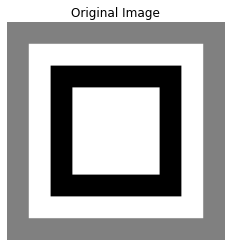

In [ ]:
I = np.zeros((10,10))
I[(2,7),2:8] = 1
I[3:8,(2,7)] = 1
I[(0,9),:] = 0.5
I[:,(0,9)] = 0.5
I = 1 - I
print(f'Original Image is {I.shape[0]} by {I.shape[1]}')
dummy = MatImshow(I, title='Original Image')

### Simple averaging kernels
$3x3$ and $5x5$ will be tested



3x3 averaging kernel

Original Image is 10 by 10


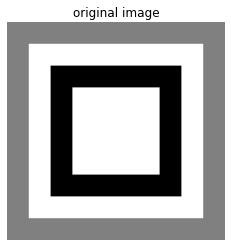

Kernel:
|     0.11     0.11     0.11 |
|     0.11     0.11     0.11 |
|     0.11     0.11     0.11 |


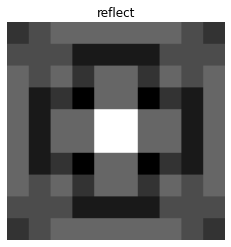

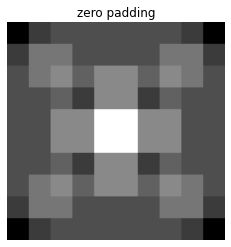

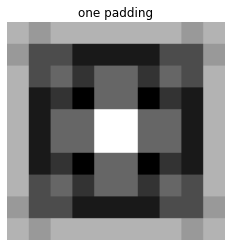

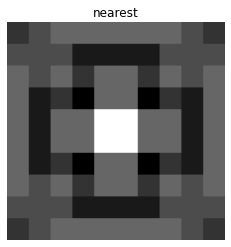

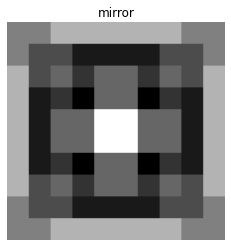

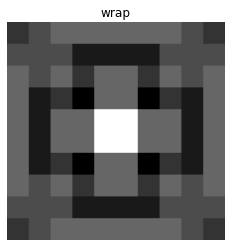

In [ ]:
# simple averaging Kernel
print(f'\n\n3x3 averaging kernel')
B = np.ones((3,3))/9
ConvolveAlternatives(I,B)



5x5 averaging kernel

Original Image is 10 by 10


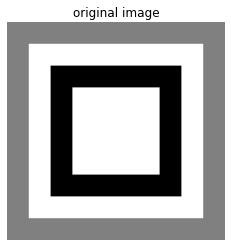

Kernel:
|     0.04     0.04     0.04     0.04     0.04 |
|     0.04     0.04     0.04     0.04     0.04 |
|     0.04     0.04     0.04     0.04     0.04 |
|     0.04     0.04     0.04     0.04     0.04 |
|     0.04     0.04     0.04     0.04     0.04 |


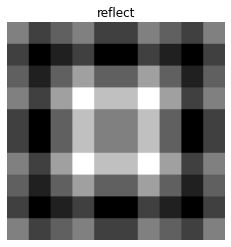

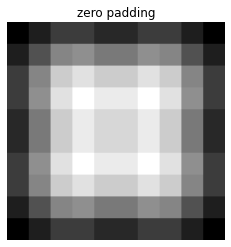

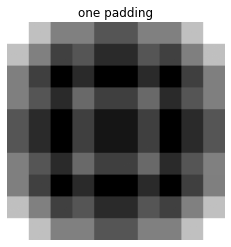

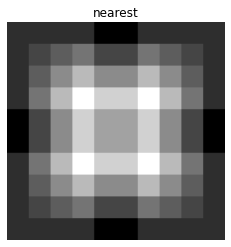

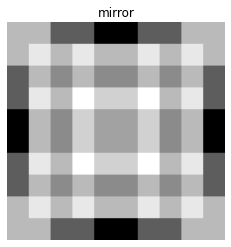

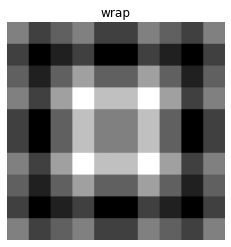

In [ ]:
print(f'\n\n5x5 averaging kernel')
B = np.ones((5,5))/25
ConvolveAlternatives(I,B)

### A weighted averaging kernel




3x3 averaging kernel very heavy at the center

Original Image is 10 by 10


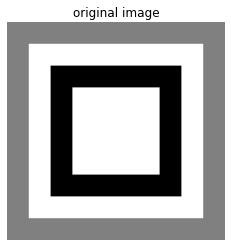

Kernel:
|     0.04     0.07     0.04 |
|     0.07     0.56     0.07 |
|     0.04     0.07     0.04 |


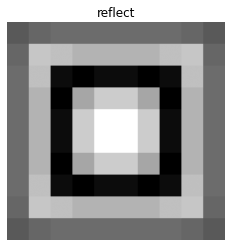

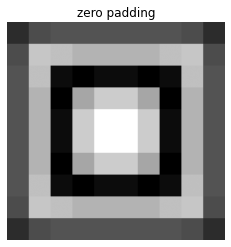

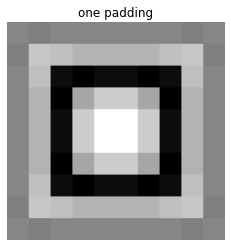

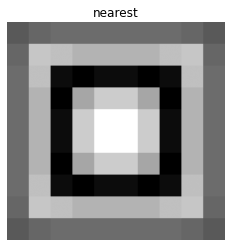

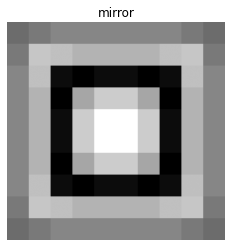

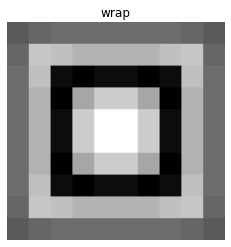

In [ ]:
# simple averaging Kernel
print(f'\n\n3x3 averaging kernel very heavy at the center')
B = np.ones((3,3))
B[1,:]=2
B[:,1]=2
B[1,1]=15
B = B / B.sum()
ConvolveAlternatives(I,B)

### What does this kernel do?  





3x3 kernel with negative entries!!!

Kernel with negative entries
|    -1.00    -1.00    -1.00 |
|     2.00     2.00     2.00 |
|    -1.00    -1.00    -1.00 |


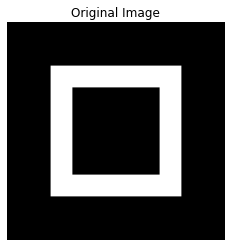

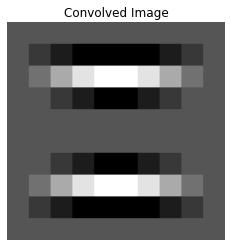

In [ ]:
# Generate a new test image
I = np.zeros((10,10))
I[(2,7),2:8] = 1
I[3:8,(2,7)] = 1
print(f'\n\n3x3 kernel with negative entries!!!')
B = np.array( [[-1, -1, -1], [2,2,2], [-1,-1,-1]] )
MatPrint(B, '\nKernel with negative entries')
IB = convolve(I,B)
IB = IB - IB.min()
IB = IB / IB.max()
MatImshow(I, 'Original Image')
dummy = MatImshow(convolve(I,B), 'Convolved Image')


### why always 3x3
try $3x1$ and $1x3$  
Don't they look like line detecteros?



3x3 averaging kernel


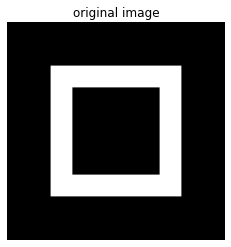

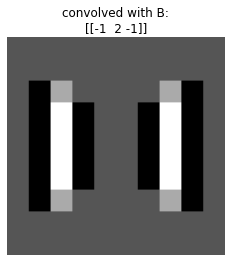

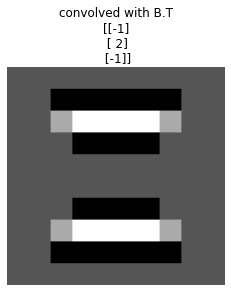

In [ ]:
# Generate a new test image
I = np.zeros((10,10))
I[(2,7),2:8] = 1
I[3:8,(2,7)] = 1
print(f'\n\n3x3 averaging kernel')
B = np.array( [[-1, 2, -1]] )
IB = convolve(I,B)
IB = IB - IB.min()
IB = IB / IB.max()
MatImshow(I, 'original image')
dummy = MatImshow(convolve(I,B), f'convolved with B:\n{B}')
dummy = MatImshow(convolve(I,B.T), f'convolved with B.T\n{B.T}')

## More kernels to play with

Base kernel **B0** is generated first, then its with respected to horizontal and vertical axes along with its reflection are tested.



3x3 averaging kernel


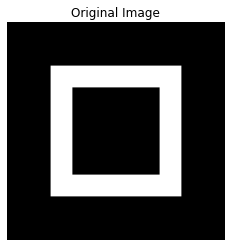


Convolved Images:


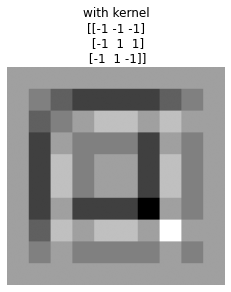

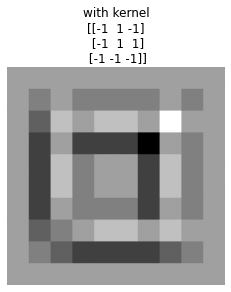

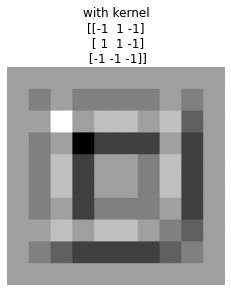

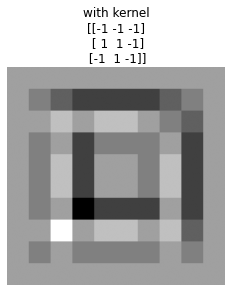

In [ ]:
# Generate a new test image
I = np.zeros((10,10))
I[(2,7),2:8] = 1
I[3:8,(2,7)] = 1
print(f'\n\n3x3 averaging kernel')
B0 = np.array( [[-1, -1, -1], [-1, 1, 1], [-1,1,-1]] )
B1 = B0[-1::-1,:] # horizontal flip of B0
B2 = B1[:,-1::-1] # vertical flip of B1
B3 = B2[-1::-1,:] # horizontal flip of B2

kernels = [B0, B1, B2, B3]

MatImshow(I, title='Original Image')
print('\nConvolved Images:')
for K in kernels:
    dummy = MatImshow(convolve(I,K), f'with kernel\n{K}')



## let's play on some more realistic images

### Start with gray scale

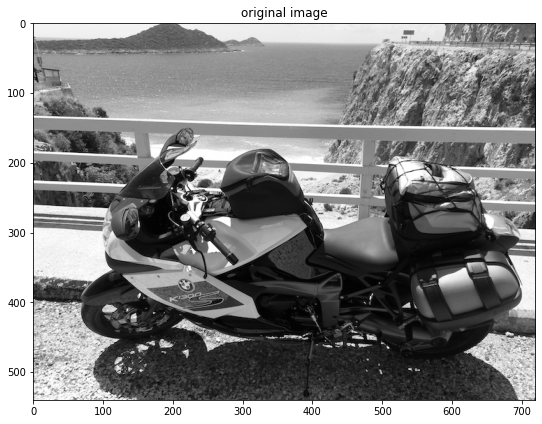

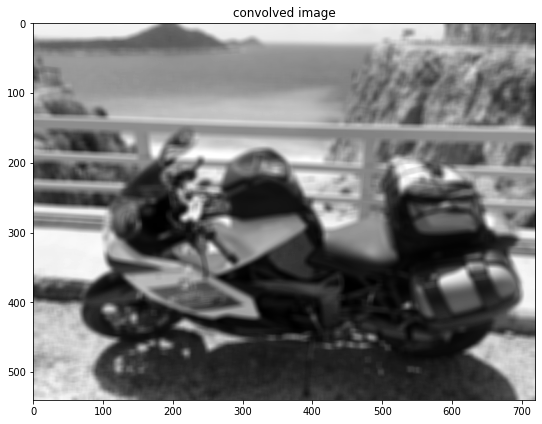

In [ ]:
fSize = (9,9)
c0 = io.imread('con2.jpg', as_gray=True)
plt.figure(figsize=fSize)
plt.imshow(c0, cmap='gray')
plt.title('original image')
filter_size = 9
b = np.ones((filter_size,filter_size)) / filter_size**2

c0c = convolve(c0, b)
plt.figure(figsize=fSize)
plt.imshow(c0c, cmap='gray')
plt.title('convolved image')
plt.show()

### How about color

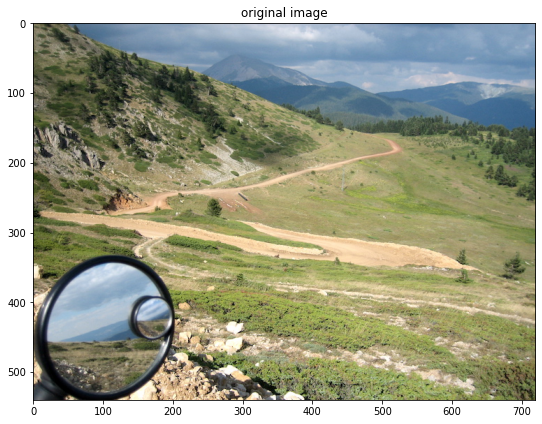

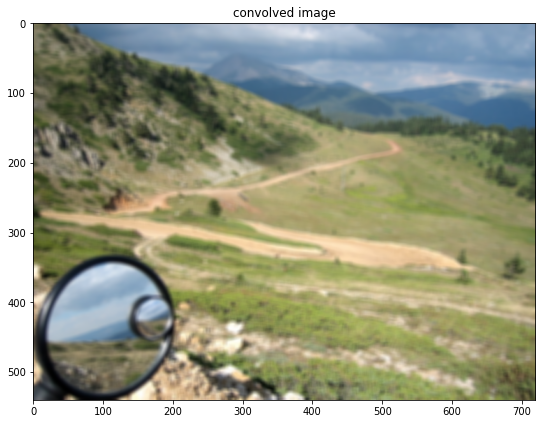

In [ ]:
fSize = (9,9)
c1 = io.imread('con3.jpg')
plt.figure(figsize=fSize)
plt.imshow(c1)
plt.title('original image')
filter_size = 7
b = np.ones((filter_size,filter_size)) / filter_size**2

c1c = c1.copy()
# blur each layer, note that you can blur each leyer with different kernels!
for i in range(c1.shape[2]):
    c1c[:,:,i] = convolve(c1[:,:,i], b)
plt.figure(figsize=fSize)
plt.imshow(c1c)
plt.title('convolved image')
plt.show()


### collection of convolved images  

What can we do using a collection of kernels?




3x3 averaging kernel
Print kernels
Kernel 1
|    -1.00    -1.00    -1.00 |
|    -1.00     1.00     1.00 |
|    -1.00     1.00    -1.00 |

 
Kernel 2
|    -1.00     1.00    -1.00 |
|    -1.00     1.00     1.00 |
|    -1.00    -1.00    -1.00 |

 
Kernel 3
|    -1.00     1.00    -1.00 |
|     1.00     1.00    -1.00 |
|    -1.00    -1.00    -1.00 |

 
Kernel 4
|    -1.00    -1.00    -1.00 |
|     1.00     1.00    -1.00 |
|    -1.00     1.00    -1.00 |

 
Kernel 5
|    -1.00     2.00    -1.00 |

 
Kernel 6
|    -1.00 |
|     2.00 |
|    -1.00 |

 
Show kernels as binary images


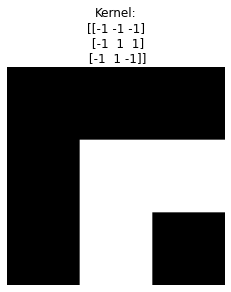

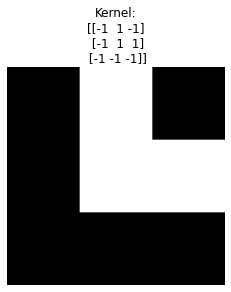

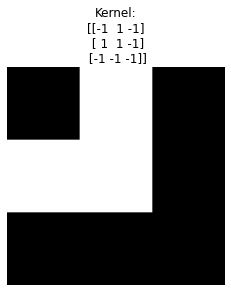

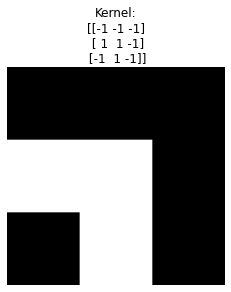

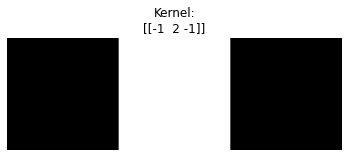

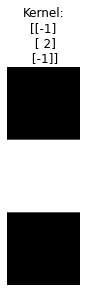

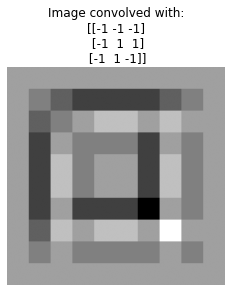

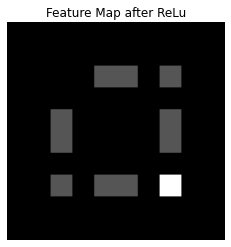

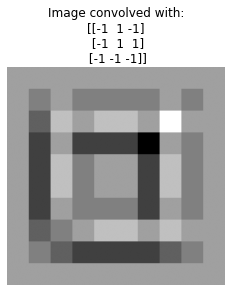

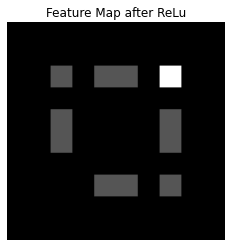

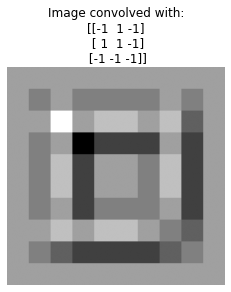

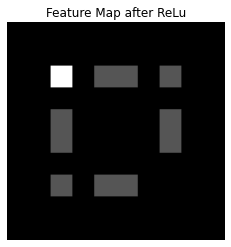

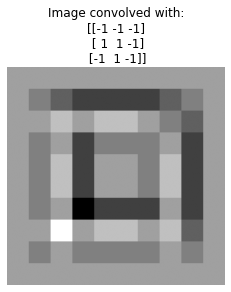

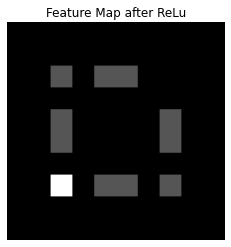

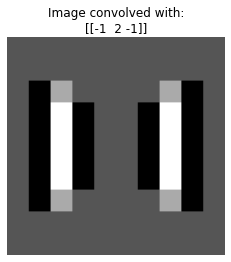

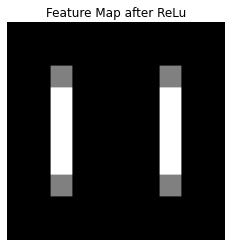

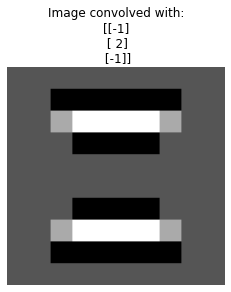

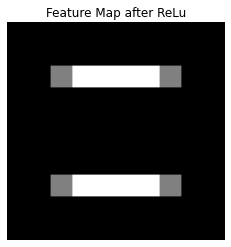

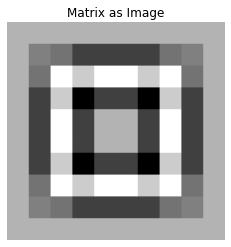

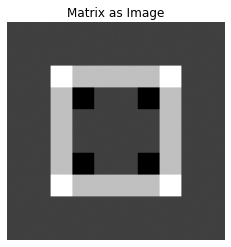

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Generate a new test image
I = np.zeros((10,10))
I[(2,7),2:8] = 1
I[3:8,(2,7)] = 1
print(f'\n\n3x3 averaging kernel')
B0 = np.array( [[-1, -1, -1], [-1, 1, 1], [-1,1,-1]] )
B1 = B0[-1::-1,:] # horizontal flip of B0
B2 = B1[:,-1::-1] # vertical flip of B1
B3 = B2[-1::-1,:] # horizontal flip of B2
Bv = np.array( [[-1, 2, -1]] )
Bh = Bv.T

B = [B0, B1, B2, B3, Bv, Bh]
print('Print kernels')
for i, K in enumerate(B):
    MatPrint(K, f'Kernel {i+1}')
    print('\n ')


print('Show kernels as binary images')
for K in B:
    MatImshow(K, f'Kernel:\n{K}')
    print('\n ')


res = np.empty((I.shape[0], I.shape[1],len(B)))
csum = np.zeros_like(I)
for ind,K in enumerate(B): #go over kernels
    r = convolve(I,K) # convolve image with the current kernel
    csum += r # add current image to running sum... just to see what happens
    MatImshow(r, f'Image convolved with:\n{K}') # dipslay the current filtered image aka feature map
    rReLUd = np.where(r<0, np.zeros_like(r), r)
    MatImshow(rReLUd, f'Feature Map after ReLu')
    print('\n ')
    res[:,:,ind] = r
    #res = np.append(res, r, axis=2)
MatImshow(csum)
MatImshow(res.max(axis=2))